<a href="https://colab.research.google.com/github/kenextra/IBM-MLCert/blob/main/Supervised_Machine_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learning: Classification

## Sections required in your report:

1. Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation and the benefits that your analysis provides to the business or stakeholders of this data. 

2. Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis. 

3. Brief summary of data exploration and actions taken for data cleaning and feature engineering. 

4. Summary of training at least three different classifier models, preferably of different nature in explainability and predictability. For example, you can start with a simple logistic regression as a baseline, adding other models or ensemble models. Preferably, all your models use the same training and test splits, or the same cross-validation method. 

5. A paragraph explaining which of your classifier models you recommend as a final model that best fits your needs in terms of accuracy and explainability. 

6. Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your classifier model. 

7. Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model after adding specific data features that may help you achieve a better explanation or a better prediction. 

## The grading will center around 5 main points:

1. Does the report include a section describing the data? 

2. Does the report include a paragraph detailing the main objective(s) of this analysis?  

3. Does the report include a section with variations of classifier models and specifies which one is the model that best suits the main objective(s) of this analysis? 

4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis? 

5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?  

# General Section

In [1]:
# install and reset runtime (for colab)
!pip install --upgrade pandas --quiet
!pip install --upgrade scikit-learn --quiet
!pip install pyproj --quiet

     |████████████████████████████████| 11.3 MB 4.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.2 which is incompatible.
     |████████████████████████████████| 22.3 MB 1.8 MB/s 
     |████████████████████████████████| 6.6 MB 5.2 MB/s 


## Import needed libraries

In [3]:
import os
import seaborn as sns
from colorsetup import colors, palette
sns.set_palette(palette)

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
# from collections import OrderedDict
from matplotlib.gridspec import GridSpec
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
%matplotlib inline

In [6]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
pd.__version__

'1.3.2'

In [7]:
import urllib.request
from zipfile import ZipFile
from pathlib import Path
from import_dataset import (load_data, basic_preprocessing,
                            add_dayof_week, add_timeof_day,
                            add_crow_direction, add_avespeed,
                            add_toll_source, add_toll_paid, filter_toll)

## Download Data

In [ ]:
DATA_URL = "https://www.mathworks.com/supportfiles/practicaldsmatlab/taxi/Taxi%20Data.zip"
DATA_NAME = "TaxiData.zip"
urllib.request.urlretrieve(DATA_URL, DATA_NAME)

('TaxiData.zip', <http.client.HTTPMessage at 0x7f26fd39ed50>)

In [ ]:
# Create a ZipFile Object and load data in it
with ZipFile(DATA_NAME, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [8]:
DATA_DIR = Path.cwd() / 'Taxi Data'
DATA_DIR

PosixPath('/content/drive/My Drive/Colab Notebooks/IBM/data/Taxi Data')

In [9]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Import and Explore Data

In [10]:
col_names = ["Vendor", "PickupTime", "DropoffTime", "Passengers", "Distance", "PickupLon", "PickupLat",
             "RateCode", "HeldFlag", "DropoffLon", "DropoffLat", "PayType", "Fare", "ExtraCharge", "Tax",
             "Tip", "Tolls", "ImpSurcharge", "TotalCharge"];

In [11]:
use_cols = ['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'RateCodeID',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount']

parse_dates = ["tpep_pickup_datetime", "tpep_dropoff_datetime"]

In [12]:
dtype = {'RateCodeID': str, 'payment_type': str, 'VendorID': str, 'RatecodeID': str,}  # , dtype=dtype

In [13]:
original = load_data(path_dir=DATA_DIR, parse_dates=parse_dates, 
                     usecols=use_cols, dtype=dtype,
                      file_substr='yellow', skiprows=1, preprocess=True, )

Loading all yellow*.csv in /content/drive/My Drive/Colab Notebooks/IBM/data/Taxi Data folder...

Converting categorical features to their corresponding values...

Removing invalid charges...

Removing invalid trip information...

Keep trips with pickup and drop off locations inside the region of interest

Adding new features: Duration...

Only keep trips with typical values..



In [14]:
df = original.copy(deep=True)

In [15]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823895 entries, 0 to 2823894
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               2823895 non-null  object        
 1   tpep_pickup_datetime   2823895 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  2823895 non-null  datetime64[ns]
 3   passenger_count        2823895 non-null  int64         
 4   trip_distance          2823895 non-null  float64       
 5   pickup_longitude       2823895 non-null  float64       
 6   pickup_latitude        2823895 non-null  float64       
 7   RateCodeID             2823895 non-null  object        
 8   store_and_fwd_flag     2823895 non-null  object        
 9   dropoff_longitude      2823895 non-null  float64       
 10  dropoff_latitude       2823895 non-null  float64       
 11  payment_type           2823895 non-null  object        
 12  fare_amount            28238

In [16]:
df.shape

(2823895, 20)

In [17]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,VeriFone Inc.,2015-01-15 14:00:41,2015-01-15 14:13:48,1,3.00,-73.964272,40.773022,Standard rate,N,-73.965775,40.804668,Cash,12.0,0.0,0.5,0.00,0.0,0.3,12.80,13.116667
1,VeriFone Inc.,2015-01-15 14:00:42,2015-01-15 14:05:01,1,0.67,-73.970932,40.795921,Standard rate,N,-73.970169,40.789124,Credit card,5.0,0.0,0.5,1.00,0.0,0.3,6.80,4.316667
2,VeriFone Inc.,2015-01-07 14:58:08,2015-01-07 15:06:36,1,0.98,-73.948692,40.777782,Standard rate,N,-73.955284,40.786869,Credit card,7.0,0.0,0.5,1.40,0.0,0.3,9.20,8.466667
3,VeriFone Inc.,2015-01-07 14:58:09,2015-01-07 15:12:55,3,4.39,-73.988663,40.722706,Standard rate,N,-73.987221,40.694408,Cash,15.5,0.0,0.5,0.00,0.0,0.3,16.30,14.766667
4,"Creative Mobile Technologies, LLC",2015-01-20 23:08:16,2015-01-20 23:23:56,1,3.90,-73.974998,40.760281,Standard rate,N,-74.008461,40.711468,Credit card,15.0,0.5,0.5,3.25,0.0,0.3,19.55,15.666667


In [18]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
2823890,"Creative Mobile Technologies, LLC",2015-12-31 23:58:08,2016-01-01 00:05:42,1,1.50,-73.992424,40.753792,Standard rate,N,-74.008942,40.740967,Cash,7.5,0.5,0.5,0.00,0.0,0.3,8.80,7.566667
2823891,"Creative Mobile Technologies, LLC",2015-12-31 23:58:54,2016-01-01 00:02:55,2,0.80,-74.011581,40.702980,Standard rate,N,-74.010216,40.712170,Credit card,5.0,0.5,0.5,1.25,0.0,0.3,7.55,4.016667
2823892,VeriFone Inc.,2015-12-31 23:58:57,2016-01-01 00:02:36,1,0.75,-73.988808,40.768791,Standard rate,N,-73.996819,40.763008,Cash,4.5,0.5,0.5,0.00,0.0,0.3,5.80,3.650000
2823893,"Creative Mobile Technologies, LLC",2015-12-31 23:59:58,2016-01-01 00:05:19,2,2.00,-73.965271,40.760281,Standard rate,N,-73.939514,40.752388,Cash,7.5,0.5,0.5,0.00,0.0,0.3,8.80,5.350000
2823894,"Creative Mobile Technologies, LLC",2015-12-31 23:59:59,2016-01-01 00:12:55,2,3.80,-73.987297,40.739079,Standard rate,N,-73.988670,40.693298,Cash,13.5,0.5,0.5,0.00,0.0,0.3,14.80,12.933333


In [19]:
# Add features
df = add_timeof_day(df)
df = add_dayof_week(df)
df = add_avespeed(df)
df = add_toll_paid(df)
df = add_toll_source(df)

In [20]:
df.describe(include=[object, bool], )

,VendorID,RateCodeID,store_and_fwd_flag,payment_type,day_of_week,toll_paid,toll_source
count,2823701,2823701,2823701,2823701,2823701,2823701,2823701
unique,2,6,2,4,7,2,11
top,VeriFone Inc.,Standard rate,N,Credit card,Saturday,NoToll,NoToll
freq,1502987,2764846,2801375,1780318,435155,2682515,2682515


In [21]:
df.toll_source.value_counts(normalize=True).to_frame()

,toll_source
NoToll,0.950000
MTA_Other,0.048879
HH,0.000472
NYPA,0.000203
OtherToll,0.000176
VN,0.000112
VN_MTA_Other,0.000067
CBGH,0.000053
CBGH_MTA_Other,0.000016
NYPA_MTA_Other,0.000012


In [22]:
df.toll_paid.value_counts(normalize=True).to_frame()

,toll_paid
NoToll,0.95
Toll,0.05


In [23]:
df.toll_paid.value_counts().to_frame()

,toll_paid
NoToll,2682515
Toll,141186


### Visualize and Calculate metrics

In [24]:
# Extract features base on above correlation
label = ['toll_paid']

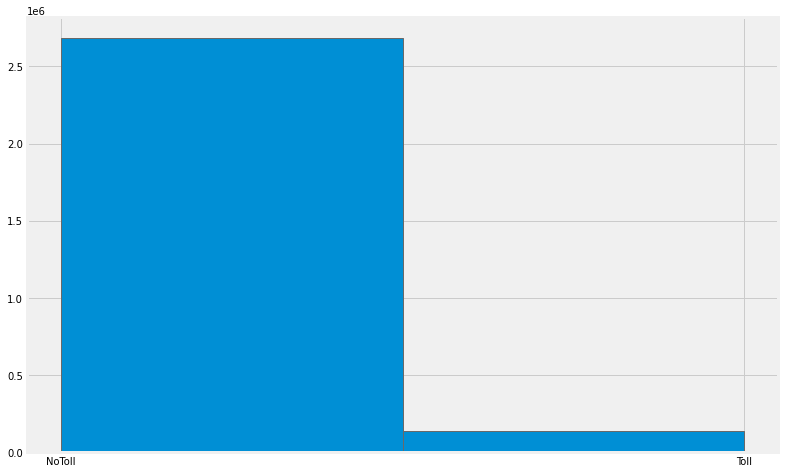

In [26]:
bin_size = len(np.unique(df[label].values))
df.toll_paid.hist(bins=bin_size, figsize=(12, 8), grid=True)
save_fig('toll_paid_dist')

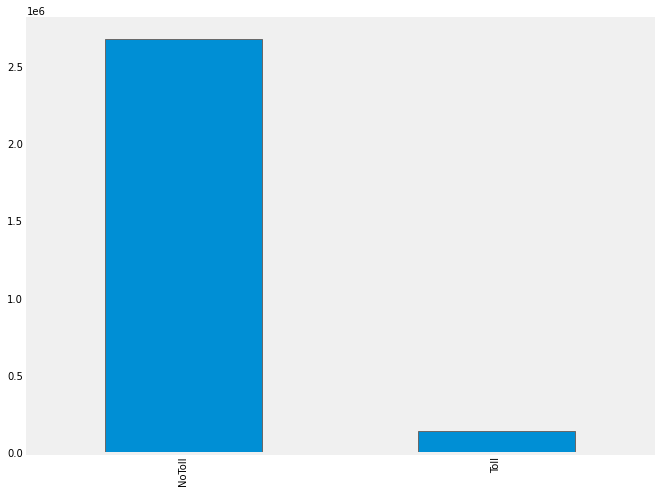

In [27]:
df['toll_paid'].value_counts().plot(kind='bar', grid=False, figsize=(10, 8))
save_fig('toll_paid_bar')

In [28]:
corr_matrix = df.corr()
corr_matrix['duration'].sort_values(ascending=False).to_frame()

,duration
duration,1.000000
fare_amount,0.888203
total_amount,0.862494
trip_distance,0.781401
tip_amount,0.493078
tolls_amount,0.457660
pickup_longitude,0.370568
dropoff_longitude,0.266498
ave_speed,0.159938
time_of_day,0.032376


## Choose target and feature variables/columns

In [29]:
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', ]
# 1. without amount
features1 = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', ]
# 2. without amount + 3 new features (1 categorical variable)
features2 = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
             'time_of_day', 'day_of_week', 'ave_speed', ]
# 3. Above abs(0.1)
features3 = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
             'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount', 'ave_speed',  ]
# 4. Above abs(0.1) + 2 new features (1 categorical variable)
features4 = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
             'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount', 'extra',
             'mta_tax', 'time_of_day', 'day_of_week', 'ave_speed', ]
# 5. all features i.e 5 categorical features
all_features = list(set(df.columns.to_list()) - set(label + ['tpep_pickup_datetime', 'tpep_dropoff_datetime',]))

In [30]:
features = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
             'time_of_day', 'day_of_week', 'ave_speed', ]

# General sklearn imports

In [31]:
from sklearn import set_config
set_config(display="diagram")
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder, OneHotEncoder,
                                   PolynomialFeatures, MinMaxScaler, LabelEncoder)

## Transform target variable

In [32]:
le = LabelEncoder()
df[label[0]] = le.fit_transform(df[label].values.ravel())

In [33]:
le.classes_

array(['NoToll', 'Toll'], dtype=object)

# Train, Val, Split

In [34]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, ShuffleSplit

In [35]:
y = df[label]
X = df[features]

In [36]:
X.head()

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,time_of_day,day_of_week,ave_speed
0,3.00,-73.964272,40.773022,-73.965775,40.804668,14.011389,Thursday,13.722999
1,0.67,-73.970932,40.795921,-73.970169,40.789124,14.011667,Thursday,9.312741
2,0.98,-73.948692,40.777782,-73.955284,40.786869,14.968889,Wednesday,6.944882
3,4.39,-73.988663,40.722706,-73.987221,40.694408,14.969167,Wednesday,17.837472
4,3.90,-73.974998,40.760281,-74.008461,40.711468,23.137778,Tuesday,14.936170


In [37]:
y.shape

(2823701, 1)

In [38]:
# Get the split indexes
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_idx, test_idx = next(strat_split.split(X, y))


# Create the dataframes
X_train = X.loc[train_idx, :]
y_train = y.loc[train_idx, :]

X_test  = X.loc[test_idx, :]
y_test  = y.loc[test_idx, :]

In [39]:
y_train.value_counts(normalize=True)

toll_paid
0            0.95
1            0.05
dtype: float64

In [40]:
y_train.value_counts()

toll_paid
0            2146011
1             112949
dtype: int64

In [41]:
y_test.value_counts(normalize=True)

toll_paid
0            0.95
1            0.05
dtype: float64

In [42]:
y_test.value_counts()

toll_paid
0            536504
1             28237
dtype: int64

In [43]:
print(f'Train data shape: {X_train.shape}\n')
print(f'Test data shape: {X_test.shape}\n')

Train data shape: (2258960, 8)

Test data shape: (564741, 8)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f707d0bb710>]],
      dtype=object)

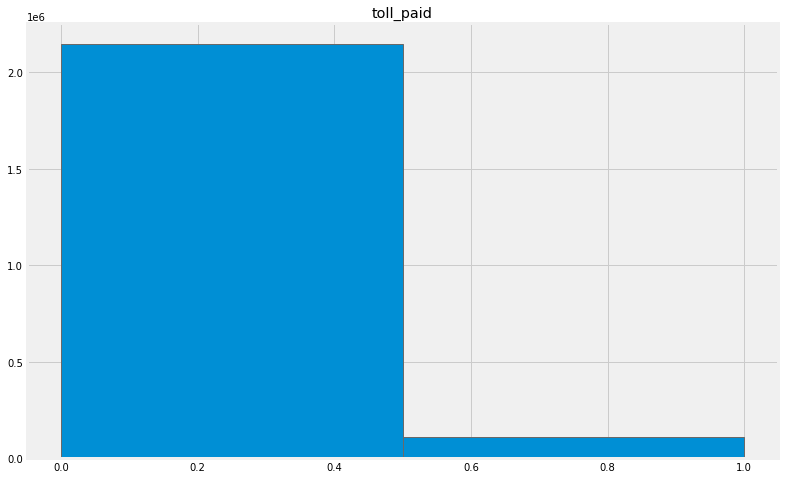

In [44]:
y_train.hist(bins=2, figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f707c95d050>]],
      dtype=object)

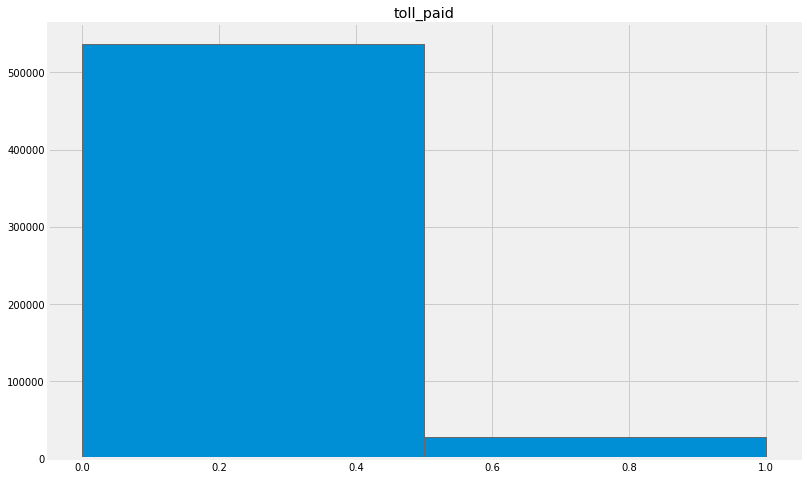

In [46]:
y_test.hist(bins=2, figsize=(12, 8))
save_fig('y_test')

# General Transformers

## Build categorical and numerical pipeline



### Preprocess Features --> Scaling and encoding

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [48]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

In [49]:
numerical_cols, categorical_cols

(Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'time_of_day', 'ave_speed'],
       dtype='object'), Index(['day_of_week'], dtype='object'))

In [50]:
transformer = ColumnTransformer([("num", MinMaxScaler(), numerical_cols),
                                 ("cat", OrdinalEncoder(), categorical_cols)
                                 ])
transformer

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'time_of_day', 'ave_speed'],
      dtype='object')),
                                ('cat', OrdinalEncoder(),
                                 Index(['day_of_week'], dtype='object'))])

# Build and Train Models

In [ ]:
models = dict()

## Logistic Regression Model

In [64]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [65]:
lr = Pipeline([('preparation', transformer), 
                     ('model', LogisticRegression(solver='liblinear'))
                     ])
lr.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'time_of_day', 'ave_speed'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model', LogisticRegression(solver='liblinear'))])

In [66]:
models['lr'] = lr

In [ ]:
cv = StratifiedKFold(n_splits=5,)
lr_l1 = Pipeline([('preparation', transformer), 
                     ('model', LogisticRegressionCV(Cs=10, cv=cv, penalty='l1', solver='liblinear', n_jobs=-1, verbose=2,))
                     ])
lr_l1.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'time_of_day', 'ave_speed'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

In [ ]:
models['l1'] = lr_l1

In [ ]:
cv = StratifiedKFold(n_splits=5,)
lr_l2 = Pipeline([('preparation', transformer), 
                     ('model', LogisticRegressionCV(Cs=10, cv=cv, penalty='l2', solver='liblinear', n_jobs=-1, verbose=1,))
                     ])
lr_l2.fit(X_train, y_train.values.ravel())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.7min finished


Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'time_of_day', 'ave_speed'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model',
                 LogisticRegressionCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                                      n_jobs=-1, solver='liblinear',
                                      verbose=1))])

In [ ]:
models['l2'] = lr_l2

## Balanced Logistic Regression

In [ ]:
lr_bal = LogisticRegression(solver='liblinear', class_weight='balanced', verbose=1)
lr_bal = Pipeline([('preparation', transformer), 
                     ('model', lr_bal)
                     ])

lr_bal.fit(X_train, y_train.values.ravel())

[LibLinear]

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'time_of_day', 'ave_speed'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model',
                 LogisticRegression(class_weight='balanced', solver='liblinear',
                                    verbose=1))])

In [ ]:
# coeff_labels = ['lr', 'l1', 'l2', 'lr_bal']
# coeff_models = [lr, lr_l1, lr_l2, lr_bal]
models['lr_bal'] = lr_bal

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', n_jobs=-1, )
knn = Pipeline([('preparation', transformer), 
                     ('model', knn)
                     ])

knn.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'time_of_day', 'ave_speed'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=10,
                                      weights='distance'))])

In [ ]:
models['knn'] = knn

## SVM --> LinearSVC

In [67]:
from sklearn.svm import LinearSVC, SVC

In [68]:
LSVC = LinearSVC(verbose=1, random_state=42, )
LSVC = Pipeline([('preparation', transformer), 
                     ('model', LSVC)
                     ])

LSVC.fit(X_train, y_train.values.ravel())

[LibLinear]

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'time_of_day', 'ave_speed'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model', LinearSVC(random_state=42, verbose=1))])

In [69]:
models['lsvc'] = LSVC

## SGDClassifier

In [70]:
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier

In [71]:
kwargs = {'kernel': 'rbf', 'n_components': 100, 'n_jobs': -1, 'random_state': 42, }
nystroem = Nystroem(**kwargs)

In [72]:
num_pipeline = Pipeline([("num",  MinMaxScaler()),
                         ('nys', nystroem),
                         ])
num_pipeline

Pipeline(steps=[('num', MinMaxScaler()),
                ('nys', Nystroem(n_jobs=-1, random_state=42))])

In [73]:
cat_pipeline = Pipeline([("cat", OrdinalEncoder()),
                         ])
cat_pipeline

Pipeline(steps=[('cat', OrdinalEncoder())])

In [74]:
transformer = ColumnTransformer([("num_pipe", num_pipeline, numerical_cols),
                                 ("cat_pipe", cat_pipeline, categorical_cols),
                                 ])
transformer

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('num', MinMaxScaler()),
                                                 ('nys',
                                                  Nystroem(n_jobs=-1,
                                                           random_state=42))]),
                                 Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'time_of_day', 'ave_speed'],
      dtype='object')),
                                ('cat_pipe',
                                 Pipeline(steps=[('cat', OrdinalEncoder())]),
                                 Index(['day_of_week'], dtype='object'))])

In [75]:
sgd = SGDClassifier(verbose=1, n_jobs=-1, early_stopping=True, random_state=42, )
sgd = Pipeline([('preparation', transformer), 
                     ('model', sgd)
                     ])

sgd.fit(X_train, y_train.values.ravel())

-- Epoch 1
Norm: 12.86, NNZs: 101, Bias: -3.162119, T: 2033064, Avg. loss: 0.085792
Total training time: 1.88 seconds.
-- Epoch 2
Norm: 12.49, NNZs: 101, Bias: -3.190890, T: 4066128, Avg. loss: 0.073280
Total training time: 4.77 seconds.
-- Epoch 3
Norm: 12.38, NNZs: 101, Bias: -3.157956, T: 6099192, Avg. loss: 0.073036
Total training time: 7.70 seconds.
-- Epoch 4
Norm: 12.29, NNZs: 101, Bias: -3.154508, T: 8132256, Avg. loss: 0.072955
Total training time: 10.63 seconds.
-- Epoch 5
Norm: 12.24, NNZs: 101, Bias: -3.122379, T: 10165320, Avg. loss: 0.072905
Total training time: 13.53 seconds.
-- Epoch 6
Norm: 12.20, NNZs: 101, Bias: -3.134510, T: 12198384, Avg. loss: 0.072892
Total training time: 16.10 seconds.
Convergence after 6 epochs took 17.06 seconds


Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('num',
                                                                   MinMaxScaler()),
                                                                  ('nys',
                                                                   Nystroem(n_jobs=-1,
                                                                            random_state=42))]),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'time_of_day', 'ave_speed'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat',
                                                                   OrdinalEncoder())]),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model',
                 SGDClassifier(early_stopping=True, n_jobs=-1, random_state=42,
                               verbose=1))])

In [76]:
models['sgd'] = sgd

## Ensemble Model --> Decision tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
transformer = ColumnTransformer([("num", MinMaxScaler(), numerical_cols),
                                 ("cat", OrdinalEncoder(), categorical_cols),
                                 ])
transformer

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'time_of_day', 'ave_speed'],
      dtype='object')),
                                ('cat', OrdinalEncoder(),
                                 Index(['day_of_week'], dtype='object'))])

In [79]:
dt = DecisionTreeClassifier(random_state=42, )
dt = Pipeline([('preparation', transformer), 
                     ('model', dt)
                     ])

dt.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'time_of_day', 'ave_speed'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [81]:
models['dtree'] = dt

## Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

In [83]:
rfc = RandomForestClassifier(random_state=42, n_estimators=100, verbose=1, n_jobs=-1)
rfc = Pipeline([('preparation', transformer), 
                     ('model', rfc)
                     ])

rfc.fit(X_train, y_train.values.ravel())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 22.0min finished


Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'time_of_day', 'ave_speed'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(n_jobs=-1, random_state=42,
                                        verbose=1))])

In [84]:
models['rfc'] = rfc

## Extra Trees Classifier

In [85]:
etc = ExtraTreesClassifier(random_state=42, n_estimators=100, verbose=1, n_jobs=-1, )
etc = Pipeline([('preparation', transformer), 
                     ('model', etc)
                     ])

etc.fit(X_train, y_train.values.ravel())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.8min finished


Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'time_of_day', 'ave_speed'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model',
                 ExtraTreesClassifier(n_jobs=-1, random_state=42, verbose=1))])

In [86]:
models['etc'] = etc

# Evaluation metrics

In [57]:
models.get('lr')

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'time_of_day', 'ave_speed'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model', LogisticRegression(solver='liblinear'))])

In [87]:
list(models.keys())

['lr', 'l1', 'l2', 'knn', 'lsvc', 'sgd', 'dtree', 'rfc', 'etc', 'lr_bal']

In [97]:
coeff_labels = list(models.keys())
coeff_models = list(models.values())

In [98]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import label_binarize

In [99]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, zero_division=0, average='binary'),
                      'recall': recall_score(y_true, y_pred, zero_division=0, average='binary'),
                      'f1': f1_score(y_true, y_pred, zero_division=0, average='binary'),
                      'auc': roc_auc_score(y_true, y_pred)
                      },
                     name=label)

In [102]:
evaluations = []
predictions = dict()

for lab, model in zip(coeff_labels, coeff_models):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    evaluations.append(measure_error(y_train, y_pred_train, f"{lab} train"))
    evaluations.append(measure_error(y_test, y_pred_test, f"{lab} test"))
    predictions[lab] = [y_pred_train, y_pred_test]

metrics = pd.concat(evaluations, axis=1)
metrics

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   15.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   35.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    8.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   25.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   53.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   12.9s finished


,lr train,lr test,l1 train,l1 test,l2 train,l2 test,knn train,knn test,lsvc train,lsvc test,sgd train,sgd test,dtree train,dtree test,rfc train,rfc test,etc train,etc test,lr_bal train,lr_bal test
accuracy,0.966464,0.966427,0.966511,0.966491,0.966520,0.966512,0.998482,0.987759,0.964873,0.964777,0.960863,0.960619,1.0,0.986380,0.999997,0.990764,1.0,0.989073,0.946083,0.946367
precision,0.698820,0.700047,0.698786,0.700254,0.698773,0.700357,0.984971,0.879647,0.688220,0.689186,0.684031,0.681849,1.0,0.864519,0.999965,0.915347,1.0,0.905894,0.480033,0.481373
recall,0.578686,0.574849,0.580421,0.576655,0.580775,0.577186,0.984674,0.874880,0.543830,0.538301,0.403766,0.398166,1.0,0.862804,0.999973,0.898360,1.0,0.872047,0.941655,0.939016
f1,0.633104,0.631301,0.634127,0.632472,0.634333,0.632834,0.984823,0.877257,0.607564,0.604470,0.507794,0.502750,1.0,0.863661,0.999969,0.906774,1.0,0.888648,0.635900,0.636469
auc,0.782780,0.780943,0.783627,0.781832,0.783799,0.782094,0.991942,0.934290,0.765431,0.762762,0.696975,0.694194,1.0,0.927844,0.999986,0.946994,1.0,0.933640,0.943985,0.942885


## Classification Report

In [101]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score

### Training Classification Report

In [103]:
for lab in coeff_labels:
    print(f'Classification report for {lab} model Training:\n\n{classification_report(y_train, predictions.get(lab)[0], zero_division=0, target_names=le.classes_)}')

Classification report for lr model Training:

              precision    recall  f1-score   support

      NoToll       0.98      0.99      0.98   2146011
        Toll       0.70      0.58      0.63    112949

    accuracy                           0.97   2258960
   macro avg       0.84      0.78      0.81   2258960
weighted avg       0.96      0.97      0.96   2258960

Classification report for l1 model Training:

              precision    recall  f1-score   support

      NoToll       0.98      0.99      0.98   2146011
        Toll       0.70      0.58      0.63    112949

    accuracy                           0.97   2258960
   macro avg       0.84      0.78      0.81   2258960
weighted avg       0.96      0.97      0.97   2258960

Classification report for l2 model Training:

              precision    recall  f1-score   support

      NoToll       0.98      0.99      0.98   2146011
        Toll       0.70      0.58      0.63    112949

    accuracy                           0.97 

### Test Classification Report

In [104]:
for lab in coeff_labels:
    print(f'Classification report for {lab} model Testing:\n\n{classification_report(y_test, predictions.get(lab)[1], zero_division=0, target_names=le.classes_)}')

Classification report for lr model Testing:

              precision    recall  f1-score   support

      NoToll       0.98      0.99      0.98    536504
        Toll       0.70      0.57      0.63     28237

    accuracy                           0.97    564741
   macro avg       0.84      0.78      0.81    564741
weighted avg       0.96      0.97      0.96    564741

Classification report for l1 model Testing:

              precision    recall  f1-score   support

      NoToll       0.98      0.99      0.98    536504
        Toll       0.70      0.58      0.63     28237

    accuracy                           0.97    564741
   macro avg       0.84      0.78      0.81    564741
weighted avg       0.96      0.97      0.96    564741

Classification report for l2 model Testing:

              precision    recall  f1-score   support

      NoToll       0.98      0.99      0.98    536504
        Toll       0.70      0.58      0.63     28237

    accuracy                           0.97    

## Training Confusion Matrix

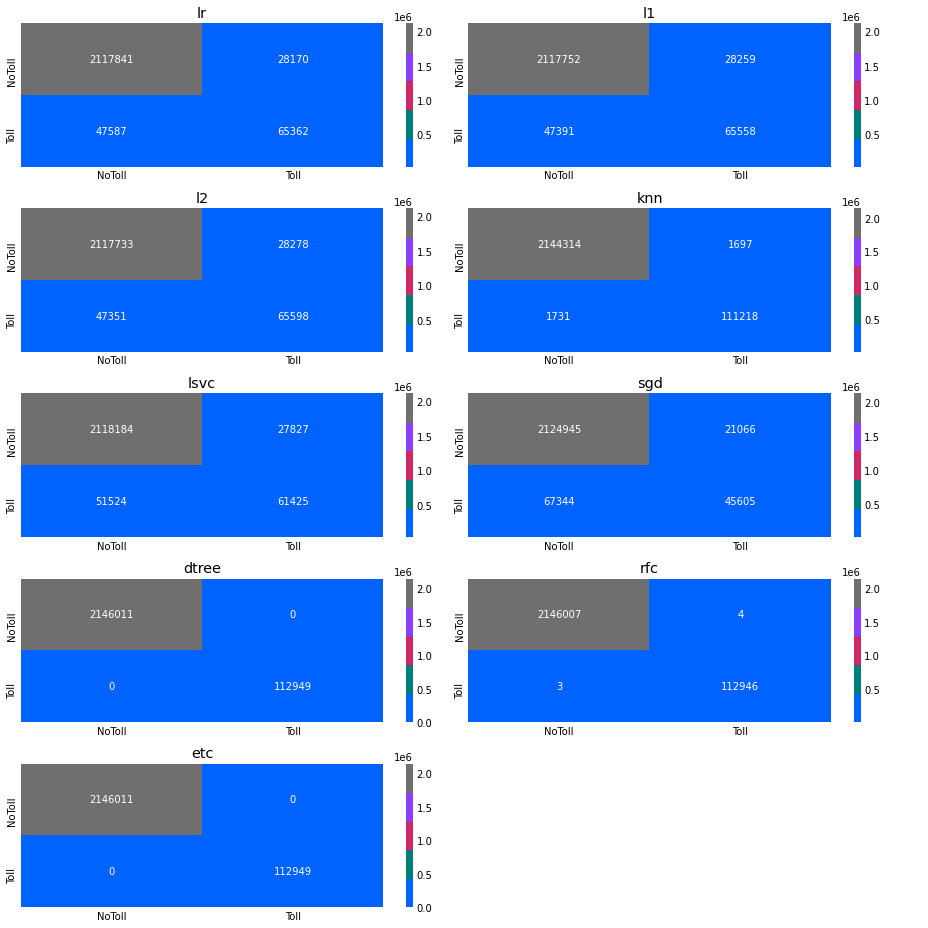

In [105]:
fig, axList = plt.subplots(nrows=5, ncols=2)
axList = axList.flatten()
fig.set_size_inches(13, 13)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(confusion_matrix(y_train, predictions.get(lab)[0]),
                ax=ax, annot=True, fmt='d', cmap=colors,
                xticklabels=le.classes_, yticklabels=le.classes_)
    ax.set(title=lab)
    
plt.tight_layout()

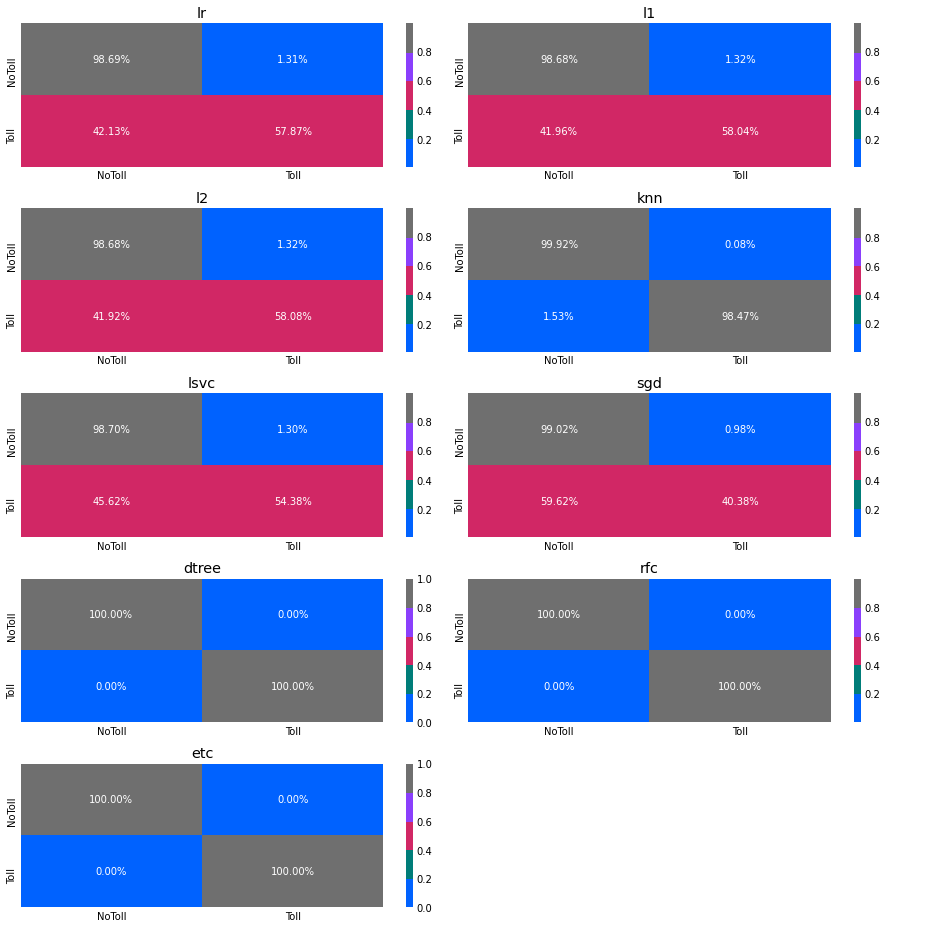

In [119]:
fig, axList = plt.subplots(nrows=5, ncols=2)
axList = axList.flatten()
fig.set_size_inches(13, 13)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    cm = confusion_matrix(y_train, predictions.get(lab)[0])
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cmn,
                ax=ax, annot=True, fmt='.2%', cmap=colors,
                xticklabels=le.classes_, yticklabels=le.classes_)
    ax.set(title=lab)
    
plt.tight_layout()

## Test Confusion Matrix

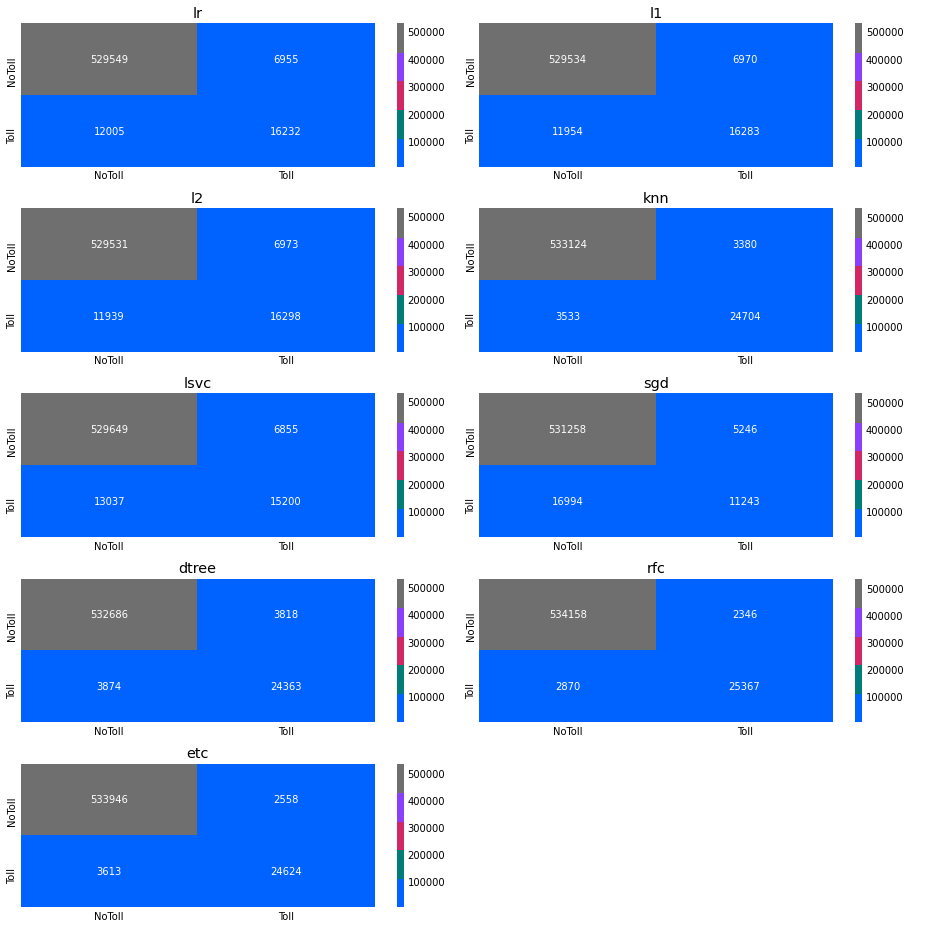

In [106]:
fig, axList = plt.subplots(nrows=5, ncols=2)
axList = axList.flatten()
fig.set_size_inches(13, 13)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(confusion_matrix(y_test, predictions.get(lab)[1]),
                ax=ax, annot=True, fmt='d', cmap=colors,
                xticklabels=le.classes_, yticklabels=le.classes_)
    ax.set(title=lab)
    
plt.tight_layout()

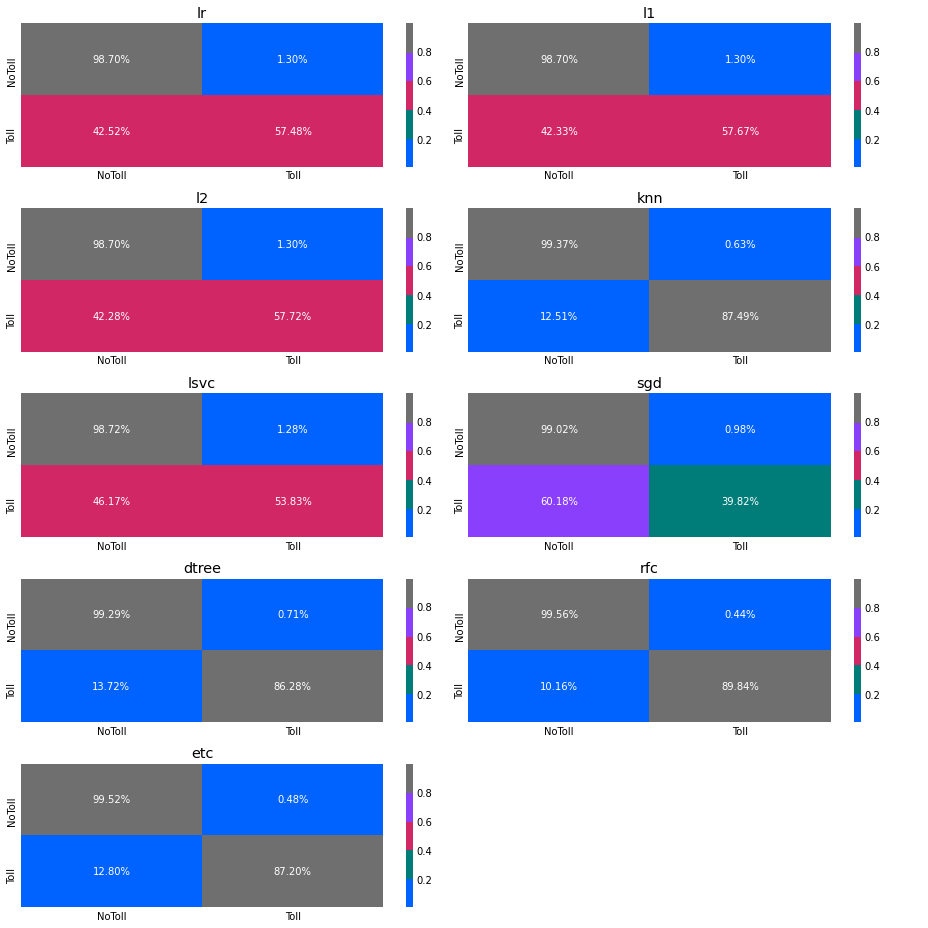

In [116]:
fig, axList = plt.subplots(nrows=5, ncols=2)
axList = axList.flatten()
fig.set_size_inches(13, 13)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    cm = confusion_matrix(y_test, predictions.get(lab)[1])
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cmn,
                ax=ax, annot=True, fmt='.2%', cmap=colors,
                xticklabels=le.classes_, yticklabels=le.classes_)
    ax.set(title=lab)
    
plt.tight_layout()

In [107]:
from sklearn.metrics import plot_confusion_matrix

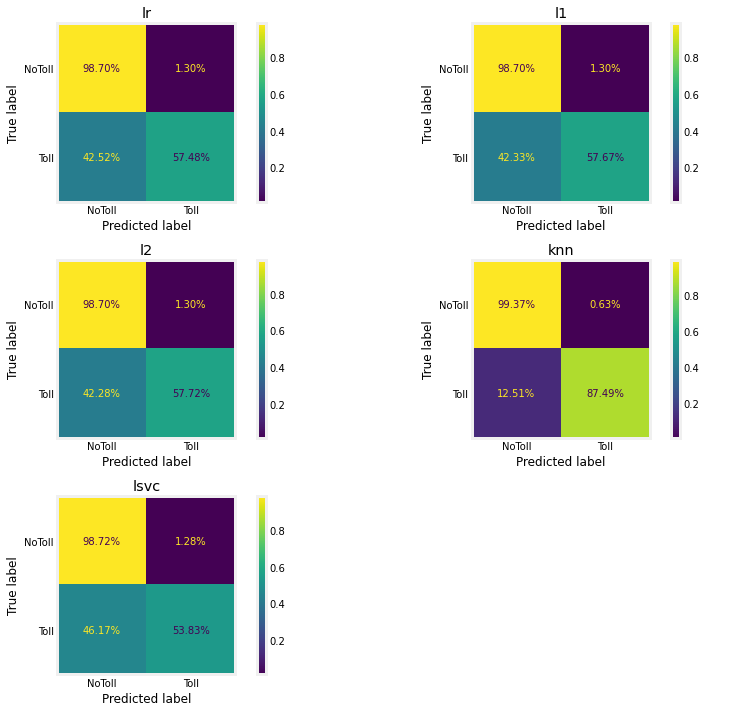

In [117]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax, lab, model in zip(axList[:-1], coeff_labels, coeff_models):
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=le.classes_,
                                 normalize='true',
                                 ax=ax, values_format='.2%')
    disp.ax_.set_title(lab)
    disp.ax_.grid(False)
    
plt.tight_layout()